In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def f(x, sigma):
        return ((np.pi/2)**0.5) * sigma * x**3

def integral(n, mu, sigma):
    distG = scipy.stats.halfnorm(mu, sigma)
    xi = distG.rvs(n)
    return np.mean(f(xi, sigma))

def fit (results):
    x = np.linspace(min(results), max(results), 1000)
    mean = np.mean(results)
    std = np.std(results, ddof=1)
    gauss = scipy.stats.norm(mean, std)
    return x, gauss.pdf(x)

## Changing N

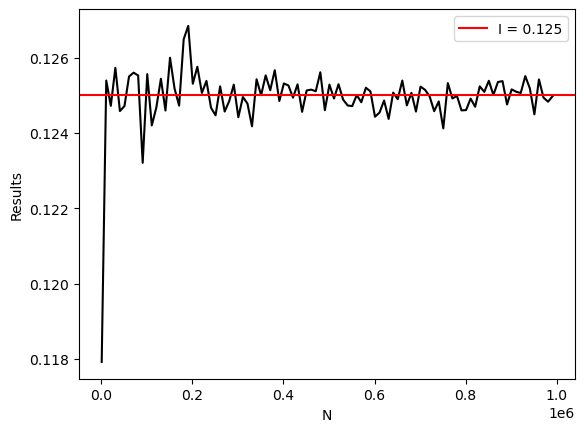

In [3]:
N = np.arange(1000, 1000001, 10000)
mu = 0
sigma = 0.5
results = np.array([integral(n, mu, sigma) for n in N])

plt.plot(N, results, color = 'k')
plt.axhline(2*(sigma**4), color = 'red', label='I = %0.3f' %(2*(sigma**4)))
plt.xlabel('N')
plt.ylabel('Results')
plt.legend()
plt.show()

## Same N

In [4]:
N_1 = 10
N_2 = 10**5
rep = 10**4
results_1 = np.array([integral(N_1, mu, sigma) for i in tqdm(range(rep))])
results_2 = np.array([integral(N_2, mu, sigma) for i in tqdm(range(rep))])

100%|██████████| 10000/10000 [01:10<00:00, 142.54it/s]


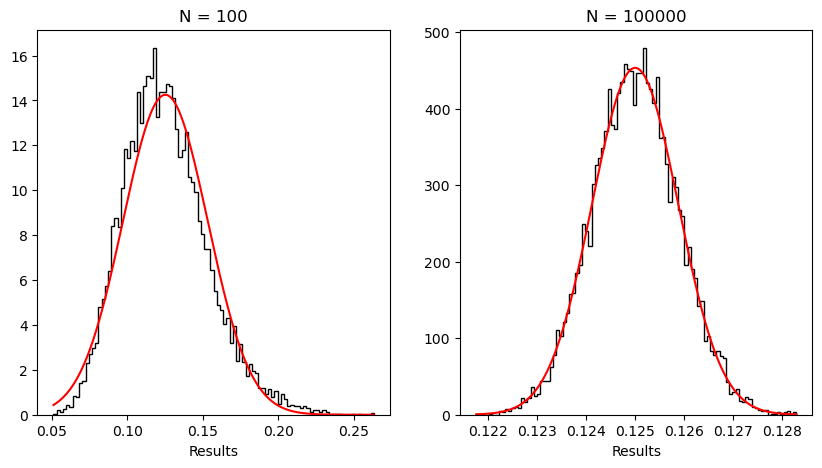

In [5]:
fit_1 = fit(results_1)
fit_2 = fit(results_2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(results_1, bins = int(np.round(rep**0.5)), density=True, color ='black', histtype = 'step')
ax1.plot(fit_1[0], fit_1[1], color ='red')
ax1.set_title('N = %i' %(N_1))
ax1.set_xlabel('Results')

ax2.hist(results_2, bins = int(np.round(rep**0.5)), density=True, color ='black', histtype = 'step')
ax2.plot(fit_2[0], fit_2[1], color ='red')
ax2.set_title('N = %i' %(N_2))
ax2.set_xlabel('Results')

plt.show()